In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Contenedores_domiciliarios.csv', sep=';')

In [4]:
len(df), len(df) * 8

(4219, 33752)

In [6]:
df.columns

Index(['GID', 'COD_CIRCUITO', 'TURNO_HORARIO', 'X', 'Y'], dtype='object')

In [1]:
from tensorflow.keras.models import load_model

In [2]:
model = load_model('modelos/container_detector.h5')

In [3]:
data_path = 'data/google_containers/test'

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [5]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 224

In [6]:
import os

In [7]:
os.listdir(data_path)

['container', 'no_container']

In [8]:
import cv2
import numpy as np

In [9]:
y_true, y_pred = [], []

for idx, folder in enumerate(sorted(os.listdir(data_path))):
    folder_path = os.path.join(data_path, folder)
    for img_path in os.listdir(folder_path):
        image = cv2.imread(os.path.join(folder_path, img_path))
        image_proc = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_proc = cv2.resize(image_proc, (224,224))
        image_proc = np.expand_dims(image_proc, 0)
        score = model.predict(preprocess_input(image_proc))[0,0]
        y_pred.append(score)
        y_true.append(idx)
        
y_true = np.array(y_true)
y_pred = np.array(y_pred)
    

In [10]:
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

In [11]:
np.mean(y_true == np.round(y_pred))

0.84125

In [12]:
roc_auc_scoreuc_scoreuc_score(y_true, y_pred)

0.8626146413363904

In [22]:
classification_report?

In [24]:
print(classification_report(y_true, np.round(y_pred),target_names=['container', 'no_container'], digits=3))

              precision    recall  f1-score   support

   container      0.903     0.620     0.735       284
no_container      0.821     0.963     0.887       516

    accuracy                          0.841       800
   macro avg      0.862     0.791     0.811       800
weighted avg      0.850     0.841     0.833       800



In [19]:
y_bin = np.zeros_like(y_true)
y_bin[y_pred>0.2] = 1
print(classification_report(y_true, y_bin))

              precision    recall  f1-score   support

           0       0.95      0.50      0.65       284
           1       0.78      0.99      0.87       516

    accuracy                           0.81       800
   macro avg       0.87      0.74      0.76       800
weighted avg       0.84      0.81      0.79       800



In [16]:
from sklearn.metrics import plot_precision_recall_curve

In [17]:
plot_precision_recall_curve?

In [28]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [19]:
model.evaluate_generator(train_ds)

/home/rlaguna/.pyenv/versions/3.7.7/envs/ml_cm/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.4668177366256714, 0.5]

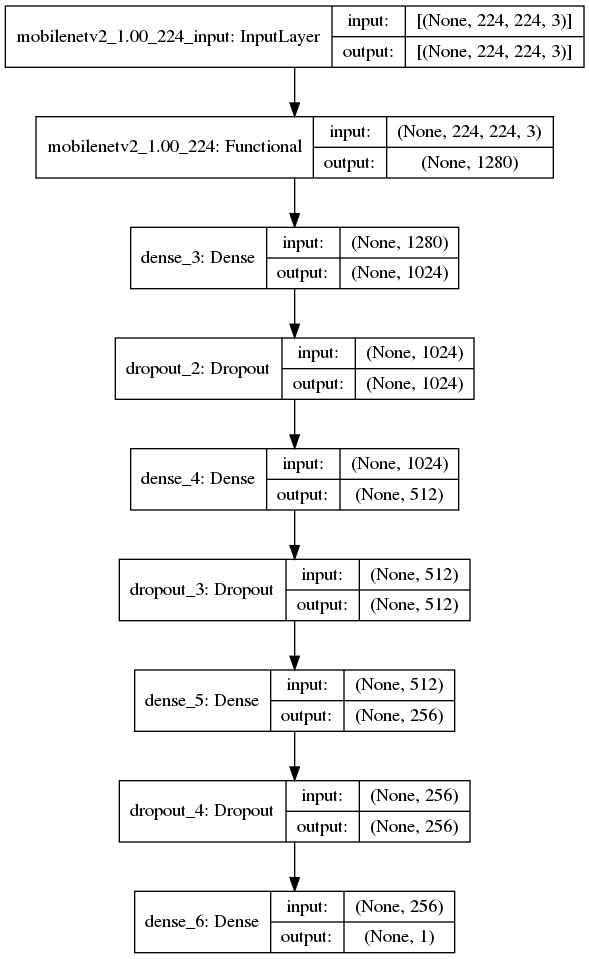

In [31]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)